# Ham or Spam - Gerçek Mesaj veya Reklam/İstenmeyen Mesaj

In [1]:
#!pip install wordcloud

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
#df=df[['v1','v2']]

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.columns=['Class',"Text"]

In [9]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

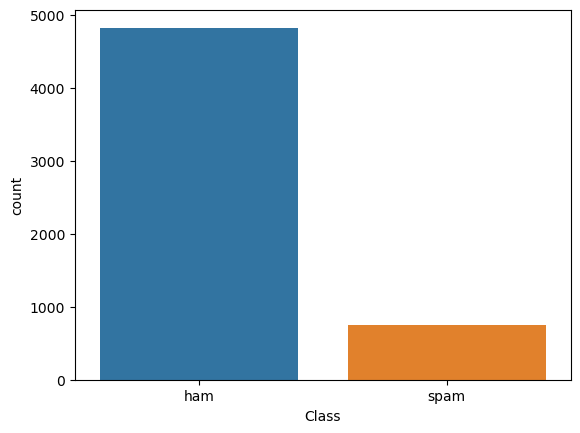

In [11]:
sns.countplot(x=df['Class'])

In [12]:
df.shape

(5572, 2)

In [13]:
df['Class'].value_counts()

Class
ham     4825
spam     747
Name: count, dtype: int64

In [14]:
d={'ham':0,'spam':1}

In [15]:
df['Class']=df['Class'].map(d)
#map for döngüsünün modern versiyonu

In [16]:
df.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['Text']=df['Text'].str.lower()
df['Text']=df['Text'].str.replace('[^\w\s]','')
df['Text']=df['Text'].str.replace('\n','')
df['Text']=df['Text'].str.replace('\d+','')
df['Text']=df['Text'].str.replace('\r','')

In [18]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image  #Klasördeki resimlerin okunması
import numpy as np

In [19]:
# DRY  Don't Repeat Yourself.

In [20]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.imshow(wc)
    plt.axis('off')

In [21]:
#' '.join("Text")

In [22]:
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [23]:
ham=df[df['Class']==0]['Text']
spam=df[df['Class']==1]['Text']

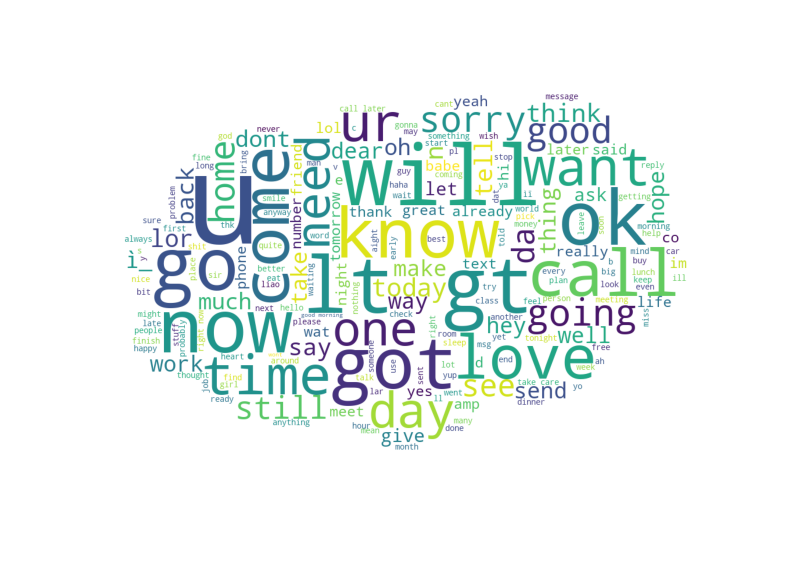

In [24]:
wc(ham,'white')

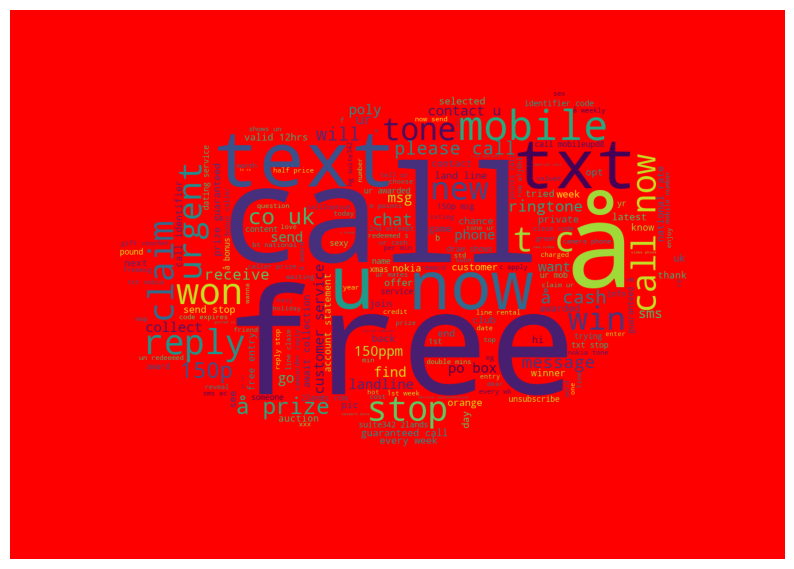

In [25]:
wc(spam,'red')

In [26]:
x=df['Text']
y=df['Class']

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
from textblob import TextBlob

In [30]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [31]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),analyzer=lemmafn)  #Dödü dönmedi

In [32]:
x=vect.fit_transform(x)


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [34]:
nb=MultinomialNB()

In [35]:
model=nb.fit(x_train,y_train)

In [36]:
tahmin=model.predict(x_test)

In [37]:
accuracy_score(tahmin,y_test)

0.97847533632287

In [38]:
tahmin

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)